In [1]:
import pandas as pd
# Data visualization
import seaborn as sns
from matplotlib import pyplot as plt
# Machine Learning
import tensorflow as tf

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


## Read in Data
#### Data is from Stanford's CS20 course notes on GitHub.
https://github.com/chiphuyen/stanford-tensorflow-tutorials

In [2]:
df = pd.read_csv('./data/birth_life_2010.csv')
df.head()

,Country,Birth rate,Life expectancy
0,Vietnam,1.822,74.828244
1,Vanuatu,3.869,70.819488
2,Tonga,3.911,72.150659
3,Timor-Leste,5.578,61.999854
4,Thailand,1.579,73.927659


In [3]:
# Style plot.
plt.style.use('ggplot')

### Visualize Data 
Given a countries birth rate the model will return that countries life expectancy.

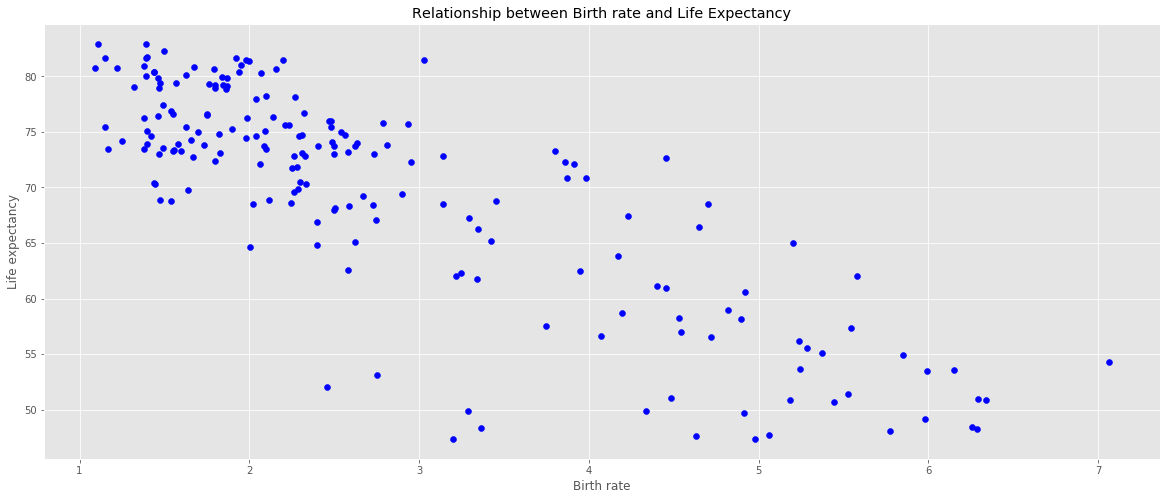

In [4]:
plt.figure(figsize=(20, 8))
plt.title('Relationship between Birth rate and Life Expectancy')
plt.xlabel('Birth rate')
plt.ylabel('Life expectancy')
plt.scatter(df['Birth rate'], df['Life expectancy'], c='b')
plt.show()

### Put data into array for Machine Learning 

In [5]:
input_X = df['Birth rate'].as_matrix().reshape(-1, 1)
# print(input_X)

In [6]:
input_Y = df['Life expectancy'].as_matrix().reshape(-1, 1)
# print(input_Y)

### Build Neural Network

In [7]:
# Hyperparameters (Tuning knobs)
learning_rate = 0.2
epochs = 2000
batch_size = 25

In [8]:
# input gate for data
X = tf.placeholder(tf.float32, shape=(None, 1), name='input_X')
Y = tf.placeholder(tf.float32, shape=(None, 1), name='input_Y')

# create weight
w = tf.Variable(tf.zeros([1, 1]), name='Weight')

# create bias
b = tf.Variable(tf.random_normal([1]), name='Bias')

# y = m * x + b 
Y_hat = tf.matmul(X, w) + b

# loss function
loss = tf.reduce_mean(tf.square(Y_hat - Y))

In [9]:
# create a summary for our loss function.
tf.summary.scalar('loss', loss)

<tf.Tensor 'loss:0' shape=() dtype=string>

In [10]:
# create a summary for our weights.
tf.summary.histogram('weights', w)

<tf.Tensor 'weights:0' shape=() dtype=string>

In [11]:
# create a summary for our biases.
tf.summary.histogram('biases', b)

<tf.Tensor 'biases:0' shape=() dtype=string>

In [12]:
optimizer = tf.train.AdamOptimizer(learning_rate).minimize(loss)

## Training

In [13]:
sess = tf.Session()

with sess.as_default():
    # initialize 
    sess.run(tf.global_variables_initializer())
    writer = tf.summary.FileWriter('./expectancy2', sess.graph)
    
    summaries = tf.summary.merge_all()
    

    #training 
    for i in range(epochs):
        # histogram summaries
        summ = sess.run(summaries, 
                  feed_dict = {
                  X: input_X, 
                  Y: input_Y
                })
        
        writer.add_summary(summ, global_step=i)

        sess.run([optimizer], 
                  feed_dict = {
                  X: input_X, 
                  Y: input_Y
                })
        
        if (i) % 5 == 0:       
            cc = sess.run(loss, feed_dict={ X: input_X, Y: input_Y})
         
        print(f'Epochs: {i}/{epochs}', 'Loss:', '{:.9f}'.format(cc))
print('Optimization Finished!')
training_loss = sess.run(loss, feed_dict={ X: input_X, Y: input_Y })
print('Final Loss: ', training_loss, 'Final Weight: ', sess.run(w), 'Bias: ', sess.run(b))  

writer.close()

Epochs: 0/2000 Loss: 4887.398437500
Epochs: 1/2000 Loss: 4887.398437500
Epochs: 2/2000 Loss: 4887.398437500
Epochs: 3/2000 Loss: 4887.398437500
Epochs: 4/2000 Loss: 4887.398437500
Epochs: 5/2000 Loss: 4400.822265625
Epochs: 6/2000 Loss: 4400.822265625
Epochs: 7/2000 Loss: 4400.822265625
Epochs: 8/2000 Loss: 4400.822265625
Epochs: 9/2000 Loss: 4400.822265625
Epochs: 10/2000 Loss: 3950.779296875
Epochs: 11/2000 Loss: 3950.779296875
Epochs: 12/2000 Loss: 3950.779296875
Epochs: 13/2000 Loss: 3950.779296875
Epochs: 14/2000 Loss: 3950.779296875
Epochs: 15/2000 Loss: 3539.080566406
Epochs: 16/2000 Loss: 3539.080566406
Epochs: 17/2000 Loss: 3539.080566406
Epochs: 18/2000 Loss: 3539.080566406
Epochs: 19/2000 Loss: 3539.080566406
Epochs: 20/2000 Loss: 3166.644287109
Epochs: 21/2000 Loss: 3166.644287109
Epochs: 22/2000 Loss: 3166.644287109
Epochs: 23/2000 Loss: 3166.644287109
Epochs: 24/2000 Loss: 3166.644287109
Epochs: 25/2000 Loss: 2833.468505859
Epochs: 26/2000 Loss: 2833.468505859
Epochs: 27/

Epochs: 243/2000 Loss: 760.824645996
Epochs: 244/2000 Loss: 760.824645996
Epochs: 245/2000 Loss: 751.591918945
Epochs: 246/2000 Loss: 751.591918945
Epochs: 247/2000 Loss: 751.591918945
Epochs: 248/2000 Loss: 751.591918945
Epochs: 249/2000 Loss: 751.591918945
Epochs: 250/2000 Loss: 742.383056641
Epochs: 251/2000 Loss: 742.383056641
Epochs: 252/2000 Loss: 742.383056641
Epochs: 253/2000 Loss: 742.383056641
Epochs: 254/2000 Loss: 742.383056641
Epochs: 255/2000 Loss: 733.200988770
Epochs: 256/2000 Loss: 733.200988770
Epochs: 257/2000 Loss: 733.200988770
Epochs: 258/2000 Loss: 733.200988770
Epochs: 259/2000 Loss: 733.200988770
Epochs: 260/2000 Loss: 724.048522949
Epochs: 261/2000 Loss: 724.048522949
Epochs: 262/2000 Loss: 724.048522949
Epochs: 263/2000 Loss: 724.048522949
Epochs: 264/2000 Loss: 724.048522949
Epochs: 265/2000 Loss: 714.928222656
Epochs: 266/2000 Loss: 714.928222656
Epochs: 267/2000 Loss: 714.928222656
Epochs: 268/2000 Loss: 714.928222656
Epochs: 269/2000 Loss: 714.928222656
E

Epochs: 546/2000 Loss: 301.748474121
Epochs: 547/2000 Loss: 301.748474121
Epochs: 548/2000 Loss: 301.748474121
Epochs: 549/2000 Loss: 301.748474121
Epochs: 550/2000 Loss: 296.474487305
Epochs: 551/2000 Loss: 296.474487305
Epochs: 552/2000 Loss: 296.474487305
Epochs: 553/2000 Loss: 296.474487305
Epochs: 554/2000 Loss: 296.474487305
Epochs: 555/2000 Loss: 291.275329590
Epochs: 556/2000 Loss: 291.275329590
Epochs: 557/2000 Loss: 291.275329590
Epochs: 558/2000 Loss: 291.275329590
Epochs: 559/2000 Loss: 291.275329590
Epochs: 560/2000 Loss: 286.150665283
Epochs: 561/2000 Loss: 286.150665283
Epochs: 562/2000 Loss: 286.150665283
Epochs: 563/2000 Loss: 286.150665283
Epochs: 564/2000 Loss: 286.150665283
Epochs: 565/2000 Loss: 281.100006104
Epochs: 566/2000 Loss: 281.100006104
Epochs: 567/2000 Loss: 281.100006104
Epochs: 568/2000 Loss: 281.100006104
Epochs: 569/2000 Loss: 281.100006104
Epochs: 570/2000 Loss: 276.123077393
Epochs: 571/2000 Loss: 276.123077393
Epochs: 572/2000 Loss: 276.123077393
E

Epochs: 774/2000 Loss: 131.343429565
Epochs: 775/2000 Loss: 128.904403687
Epochs: 776/2000 Loss: 128.904403687
Epochs: 777/2000 Loss: 128.904403687
Epochs: 778/2000 Loss: 128.904403687
Epochs: 779/2000 Loss: 128.904403687
Epochs: 780/2000 Loss: 126.513725281
Epochs: 781/2000 Loss: 126.513725281
Epochs: 782/2000 Loss: 126.513725281
Epochs: 783/2000 Loss: 126.513725281
Epochs: 784/2000 Loss: 126.513725281
Epochs: 785/2000 Loss: 124.170608521
Epochs: 786/2000 Loss: 124.170608521
Epochs: 787/2000 Loss: 124.170608521
Epochs: 788/2000 Loss: 124.170608521
Epochs: 789/2000 Loss: 124.170608521
Epochs: 790/2000 Loss: 121.874534607
Epochs: 791/2000 Loss: 121.874534607
Epochs: 792/2000 Loss: 121.874534607
Epochs: 793/2000 Loss: 121.874534607
Epochs: 794/2000 Loss: 121.874534607
Epochs: 795/2000 Loss: 119.624916077
Epochs: 796/2000 Loss: 119.624916077
Epochs: 797/2000 Loss: 119.624916077
Epochs: 798/2000 Loss: 119.624916077
Epochs: 799/2000 Loss: 119.624916077
Epochs: 800/2000 Loss: 117.420951843
E

Epochs: 1058/2000 Loss: 51.256839752
Epochs: 1059/2000 Loss: 51.256839752
Epochs: 1060/2000 Loss: 50.617218018
Epochs: 1061/2000 Loss: 50.617218018
Epochs: 1062/2000 Loss: 50.617218018
Epochs: 1063/2000 Loss: 50.617218018
Epochs: 1064/2000 Loss: 50.617218018
Epochs: 1065/2000 Loss: 49.994663239
Epochs: 1066/2000 Loss: 49.994663239
Epochs: 1067/2000 Loss: 49.994663239
Epochs: 1068/2000 Loss: 49.994663239
Epochs: 1069/2000 Loss: 49.994663239
Epochs: 1070/2000 Loss: 49.388839722
Epochs: 1071/2000 Loss: 49.388839722
Epochs: 1072/2000 Loss: 49.388839722
Epochs: 1073/2000 Loss: 49.388839722
Epochs: 1074/2000 Loss: 49.388839722
Epochs: 1075/2000 Loss: 48.799385071
Epochs: 1076/2000 Loss: 48.799385071
Epochs: 1077/2000 Loss: 48.799385071
Epochs: 1078/2000 Loss: 48.799385071
Epochs: 1079/2000 Loss: 48.799385071
Epochs: 1080/2000 Loss: 48.225910187
Epochs: 1081/2000 Loss: 48.225910187
Epochs: 1082/2000 Loss: 48.225910187
Epochs: 1083/2000 Loss: 48.225910187
Epochs: 1084/2000 Loss: 48.225910187
E

Epochs: 1288/2000 Loss: 34.708148956
Epochs: 1289/2000 Loss: 34.708148956
Epochs: 1290/2000 Loss: 34.547565460
Epochs: 1291/2000 Loss: 34.547565460
Epochs: 1292/2000 Loss: 34.547565460
Epochs: 1293/2000 Loss: 34.547565460
Epochs: 1294/2000 Loss: 34.547565460
Epochs: 1295/2000 Loss: 34.392196655
Epochs: 1296/2000 Loss: 34.392196655
Epochs: 1297/2000 Loss: 34.392196655
Epochs: 1298/2000 Loss: 34.392196655
Epochs: 1299/2000 Loss: 34.392196655
Epochs: 1300/2000 Loss: 34.241931915
Epochs: 1301/2000 Loss: 34.241931915
Epochs: 1302/2000 Loss: 34.241931915
Epochs: 1303/2000 Loss: 34.241931915
Epochs: 1304/2000 Loss: 34.241931915
Epochs: 1305/2000 Loss: 34.096607208
Epochs: 1306/2000 Loss: 34.096607208
Epochs: 1307/2000 Loss: 34.096607208
Epochs: 1308/2000 Loss: 34.096607208
Epochs: 1309/2000 Loss: 34.096607208
Epochs: 1310/2000 Loss: 33.956073761
Epochs: 1311/2000 Loss: 33.956073761
Epochs: 1312/2000 Loss: 33.956073761
Epochs: 1313/2000 Loss: 33.956073761
Epochs: 1314/2000 Loss: 33.956073761
E

Epochs: 1593/2000 Loss: 30.618806839
Epochs: 1594/2000 Loss: 30.618806839
Epochs: 1595/2000 Loss: 30.602396011
Epochs: 1596/2000 Loss: 30.602396011
Epochs: 1597/2000 Loss: 30.602396011
Epochs: 1598/2000 Loss: 30.602396011
Epochs: 1599/2000 Loss: 30.602396011
Epochs: 1600/2000 Loss: 30.586675644
Epochs: 1601/2000 Loss: 30.586675644
Epochs: 1602/2000 Loss: 30.586675644
Epochs: 1603/2000 Loss: 30.586675644
Epochs: 1604/2000 Loss: 30.586675644
Epochs: 1605/2000 Loss: 30.571592331
Epochs: 1606/2000 Loss: 30.571592331
Epochs: 1607/2000 Loss: 30.571592331
Epochs: 1608/2000 Loss: 30.571592331
Epochs: 1609/2000 Loss: 30.571592331
Epochs: 1610/2000 Loss: 30.557136536
Epochs: 1611/2000 Loss: 30.557136536
Epochs: 1612/2000 Loss: 30.557136536
Epochs: 1613/2000 Loss: 30.557136536
Epochs: 1614/2000 Loss: 30.557136536
Epochs: 1615/2000 Loss: 30.543287277
Epochs: 1616/2000 Loss: 30.543287277
Epochs: 1617/2000 Loss: 30.543287277
Epochs: 1618/2000 Loss: 30.543287277
Epochs: 1619/2000 Loss: 30.543287277
E

Epochs: 1868/2000 Loss: 30.271911621
Epochs: 1869/2000 Loss: 30.271911621
Epochs: 1870/2000 Loss: 30.270618439
Epochs: 1871/2000 Loss: 30.270618439
Epochs: 1872/2000 Loss: 30.270618439
Epochs: 1873/2000 Loss: 30.270618439
Epochs: 1874/2000 Loss: 30.270618439
Epochs: 1875/2000 Loss: 30.269390106
Epochs: 1876/2000 Loss: 30.269390106
Epochs: 1877/2000 Loss: 30.269390106
Epochs: 1878/2000 Loss: 30.269390106
Epochs: 1879/2000 Loss: 30.269390106
Epochs: 1880/2000 Loss: 30.268217087
Epochs: 1881/2000 Loss: 30.268217087
Epochs: 1882/2000 Loss: 30.268217087
Epochs: 1883/2000 Loss: 30.268217087
Epochs: 1884/2000 Loss: 30.268217087
Epochs: 1885/2000 Loss: 30.267110825
Epochs: 1886/2000 Loss: 30.267110825
Epochs: 1887/2000 Loss: 30.267110825
Epochs: 1888/2000 Loss: 30.267110825
Epochs: 1889/2000 Loss: 30.267110825
Epochs: 1890/2000 Loss: 30.266056061
Epochs: 1891/2000 Loss: 30.266056061
Epochs: 1892/2000 Loss: 30.266056061
Epochs: 1893/2000 Loss: 30.266056061
Epochs: 1894/2000 Loss: 30.266056061
E

## Linear Regression Model 

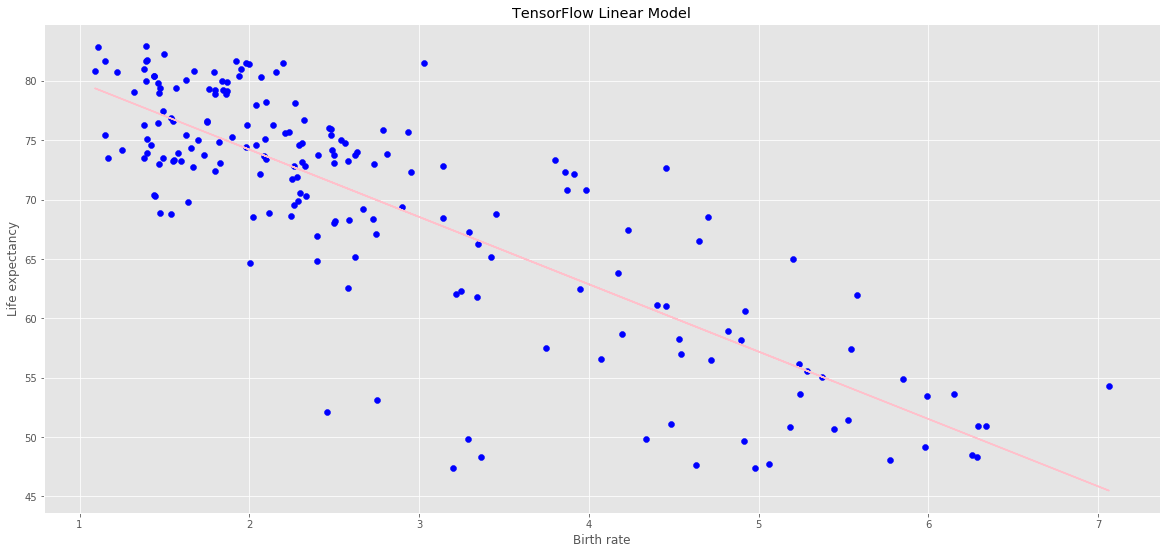

In [14]:
plt.figure(figsize=(20,9))
plt.title('TensorFlow Linear Model')
plt.xlabel('Birth rate')
plt.ylabel('Life expectancy')
plt.scatter(df['Birth rate'], df['Life expectancy'], c='b')
plt.plot(input_X,sess.run(w) * input_X + sess.run(b), c='pink')
plt.show()

### Make Prediction
#### What if the birth rate of some country was 2 what would are model predict?

In [15]:
sess.run(Y_hat, feed_dict={X:[[2.000]]})

array([[74.20796]], dtype=float32)

### TensorBoard 

Lets use tensorboard to look at the graph.

In [ ]:
!tensorboard --logdir='./expectancy2' 

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
2018-05-29 12:18:34.557528: I tensorflow/core/platform/cpu_feature_guard.cc:140] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA
TensorBoard 1.8.0 at http://Akils-Air.home:6006 (Press CTRL+C to quit)
W0529 12:18:43.562465 Thread-1 application.py:274] path /[[_dataImageSrc]] not found, sending 404
W0529 12:18:43.563755 Thread-2 application.py:274] path /[[_imageURL]] not found, sending 404
